https://www.kaggle.com/code/esraameslamsayed/text-classification-using-rnn/notebook

https://colab.research.google.com/drive/1np_SSUtZbK8TcERefKSxrhGjvZZx1HOR?usp=sharing

Data is available here https://www.kaggle.com/code/esraameslamsayed/text-classification-using-rnn/input

In [ ]:
#read the data
import pandas as pd
df=pd.read_csv("/alldata_1_for_kaggle.csv",encoding='latin1')
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


# 📎Initial Data Exploration and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.6+ KB



* data has no Null Values
* its shape is(7570,3)

In [ ]:
#Check Duplicated vals
df.duplicated().sum()

np.int64(0)

In [ ]:
#rename cols
df = df.rename(columns={'0': 'labels', 'a': 'text'})

In [ ]:
# df['labels'].unique()
df['labels'].value_counts()

,count
labels,
Thyroid_Cancer,2810
Colon_Cancer,2580
Lung_Cancer,2180


* The classification problem involves three distinct classes:
> 1. **Thyroid Cancer**
> 2. **Colon Cancer**
> 3. **Lung Cancer**

In [ ]:
texts = df['text'].values
labels = df['labels'].values

# 📎Spliting the data

In [ ]:
#split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42,shuffle=True,stratify=labels)

print("Dimensions of X_train :", X_train.shape)
print("Dimensions of X_test  :", X_test.shape)
print("Dimensions of y_train :", y_train.shape)
print("Dimensions of y_test  :", y_test.shape)

Dimensions of X_train : (6056,)
Dimensions of X_test  : (1514,)
Dimensions of y_train : (6056,)
Dimensions of y_test  : (1514,)


> * **shuffle**:shuffle the data before splitting
> * **stratify**: ensures that the class distribution in the training and testing sets is proportional to the class distribution in the original dataset.

In [ ]:
X_train[0]

'environmental exposure to arsenite as3 has a strong association with the development ofhuman urothelial cancer uc and is the 5th most common cancer in men and the 12th mostcommon cancer in women muscle invasive urothelial cancer miuc are grouped into basalor luminal molecular subtypes based on their gene expression profile the basal subtype ismore aggressive and can be associated with squamous differentiation characterized byhigh expression of keratins krt1    and  and epidermal growth factor receptoregfr within the tumors the luminal subtype is less aggressive and is predominatelycharacterized by elevated gene expression of peroxisome proliferatoractivated receptamma pparÎ and forkhead box protein a1 foxa1 we have previously shown thatas3transformed urothelial cells ast exhibit a basal subtype of uc expressing genesassociated with squamous differentiation we hypothesized that the molecular subtype ofthe ast cells could be altered by inducing the expression of pparÎ andor inhibiting t

# 📎Text Tokenization and Sequence Conversion


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_seq[0]

[1408,
 317,
 5,
 31211,
 8217,
 49,
 6,
 898,
 205,
 7,
 1,
 172,
 12545,
 6073,
 15,
 1991,
 3,
 11,
 1,
 16893,
 109,
 292,
 15,
 4,
 791,
 3,
 1,
 6446,
 10689,
 15,
 4,
 320,
 1560,
 664,
 6073,
 15,
 59330,
 21,
 4736,
 110,
 191448,
 2666,
 221,
 1245,
 103,
 19,
 93,
 64,
 25,
 1458,
 1,
 2336,
 1595,
 24737,
 2024,
 3,
 55,
 26,
 81,
 7,
 623,
 494,
 1346,
 66421,
 25,
 2,
 26502,
 33563,
 3,
 3,
 1546,
 133,
 188,
 59331,
 252,
 1,
 156,
 1,
 2666,
 1595,
 11,
 437,
 2024,
 3,
 11,
 191449,
 12,
 588,
 64,
 25,
 2,
 7738,
 7222,
 191450,
 1716,
 3,
 10747,
 2072,
 62,
 2884,
 5851,
 30,
 34,
 353,
 115,
 191451,
 6073,
 16,
 2945,
 2001,
 6,
 2336,
 1595,
 2,
 1991,
 1537,
 37046,
 7,
 623,
 494,
 30,
 2821,
 13,
 1,
 221,
 1595,
 519,
 2945,
 16,
 135,
 26,
 1202,
 12,
 1921,
 1,
 25,
 2,
 1716,
 855,
 1184,
 7766,
 2,
 1,
 16,
 37889,
 3,
 2945,
 16,
 10,
 184,
 7,
 191452,
 37047,
 4121,
 874,
 21556,
 1039,
 28,
 293,
 453,
 874,
 18,
 6,
 362,
 30397,
 3,
 1039,
 8,
 223

> * **Tokenizer**: Converts text into sequences of integers, with each integer representing a unique word.
> * **fit_on_texts**: Updates the tokenizer’s vocabulary with words from the provided texts, building the word-to-integer mapping.
> * **texts_to_sequences**: Transforms each text into a sequence of integers based on the word index created by fit_on_texts.

# 📎Sequence Padding and Length Adjustment

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max([len(seq) for seq in X_train_seq])  # Maximum length of sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

X_train_pad[0]

array([    0,     0,     0, ...,     9, 70151,   165], dtype=int32)

* **pad_sequences**:Pads sequences to ensure that they all have the same length
> * **maxlen**:  the maximum length of the sequences. Sequences longer than this length will be truncated, and shorter sequences will be padded.
> * **padding**: 'pre' or 'post'. Whether to pad sequences at the beginning or the end (default is 'pre').
> * **truncating**: 'pre' or 'post'. Whether to truncate sequences at the beginning or the end (default is 'pre').

* **difference between Padding and Truncating**
> * **Padding**:To ensure all sequences in the dataset have the same length by adding extra values (usually zeros) to sequences that are shorter than the desired length.
> * **Truncating**:To shorten sequences that exceed the maximum length by removing values from either the start or end of the sequence.

*  **max([len(seq) for seq in X_train_seq])**
> *  it makes length equals to max length of sequence
> * so you do not need to do any Truncating

# 📎One-Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_ = label_encoder.fit_transform(y_train)
y_test_ = label_encoder.transform(y_test)



y_train_cat = to_categorical(y_train_, num_classes=3)
y_test_cat = to_categorical(y_test_, num_classes=3)

y_train_cat


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

> * **LabelEncoder**: Converts categorical labels (strings) into integer labels
> * **to_categorical**: Converts a class vector (integers) to binary class matrix (one-hot encoding), which is useful for categorical classification problems.

# 📎RNN Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len))
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


> * **Sequential**: A linear stack of layers. You can add layers to the model in a sequential manner.
> * **Embedding**: Turns positive integers (indexes) into dense vectors of fixed size, often used as the first layer in text-based neural networks to convert words into vectors.
> * **SimpleRNN**: A basic RNN layer that processes input sequences and has an internal state that captures temporal dependencies.
> * **Dense**: A fully connected layer where each neuron is connected to every neuron in the previous layer.

* **Sequential**:
> * Initializes a new, empty model. Layers will be added sequentially.

* **Embedding Layer**:This layer converts the integer sequences of words (generated by Tokenizer) into dense vectors of fixed size
> * **input_dim**: The size of the vocabulary (num of unique words in the dataset+1).
 > >   * 1 for padding
> * **output_dim**: The dimension of the dense embedding vectors. Each word is represented as a 128-dimensional vector.
> * **input_length**: The length of input sequences. Each sequence has been padded to max_len

* **SimpleRNN Layer:**: This layer processes the sequences output by the Embedding layer
> * **128**: The number of units (neurons) in the RNN. Each unit maintains a hidden state and processes one word at a time in the sequence, updating the hidden state with each word.
> * **return_sequences=False**: The RNN will only output the final hidden state after processing the entire sequence. If True, it would return the hidden state at each timestep, which is useful for stacking RNN layers.

* **Dense Layer**:This layer is used to classify the final output from the RNN into one of the three cancer types
> * **3**: The number of output units, corresponding to the number of classes (e.g., Thyroid Cancer, Colon Cancer, Lung Cancer).
> * **activation='softmax'**: The softmax activation function converts the output of the Dense layer into probabilities, summing to 1 across the 3 classes.

# 📎Compile the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

> * **optimizer='adam'**: The Adam optimizer adjusts the learning rate dynamically during training, leading to faster convergence and better performance.
> * **loss='categorical_crossentropy'**: The categorical crossentropy loss function is ideal for multi-class classification problems, comparing predicted probabilities with the true class labels.
> * **metrics=['accuracy']**: Accuracy is tracked during training to provide a clear and intuitive measure of how well the model is performing in classifying the data.

# 📎Train the Model

In [ ]:
history = model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
history

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 70s 432ms/step - accuracy: 0.4746 - loss: 1.0183 - val_accuracy: 0.7401 - val_loss: 0.8624
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 64s 422ms/step - accuracy: 0.8186 - loss: 0.7728 - val_accuracy: 0.7690 - val_loss: 0.6815
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 82s 422ms/step - accuracy: 0.8420 - loss: 0.5888 - val_accuracy: 0.8457 - val_loss: 0.4648
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 64s 422ms/step - accuracy: 0.8675 - loss: 0.4090 - val_accuracy: 0.8696 - val_loss: 0.3480
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 64s 423ms/step - accuracy: 0.9006 - loss: 0.2785 - val_accuracy: 0.8969 - val_loss: 0.2360


> * **X_train_pad** and **y_train_cat**: These are the input data and corresponding labels used for training the model.
> * **epochs=5**: The model will be trained over 5 full iterations through the dataset.
> * **batch_size=32**: The data will be processed in batches of 32 samples at a time, leading to frequent updates to the model's weights.
> * **validation_split=0.2**: 20% of the training data will be used for validation, allowing you to monitor the model's performance on unseen data during training.
> * **history**: This object stores the training history, which can be analyzed to evaluate the model's performance over time

# 📎Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test_cat)

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9038 - loss: 0.2323
Test loss: 0.2221168726682663
Test accuracy: 0.9114927053451538


In [ ]:
import numpy as np
predictions = model.predict(X_test_pad)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step


array([1, 1, 2, ..., 1, 2, 2])

In [ ]:
res_df = pd.DataFrame({
    'Actual Labels': y_test_,
    'Predicted Labels': predicted_labels
})

res_df[:30]


,Actual Labels,Predicted Labels
0,1,1
1,1,1
2,2,2
3,0,0
4,1,1
5,2,2
6,2,0
7,0,0
8,2,2
9,1,1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_, predicted_labels, target_names=label_encoder.classes_))


                precision    recall  f1-score   support

  Colon_Cancer       0.85      0.92      0.88       516
   Lung_Cancer       0.98      0.95      0.97       436
Thyroid_Cancer       0.92      0.87      0.90       562

      accuracy                           0.91      1514
     macro avg       0.92      0.91      0.92      1514
  weighted avg       0.91      0.91      0.91      1514



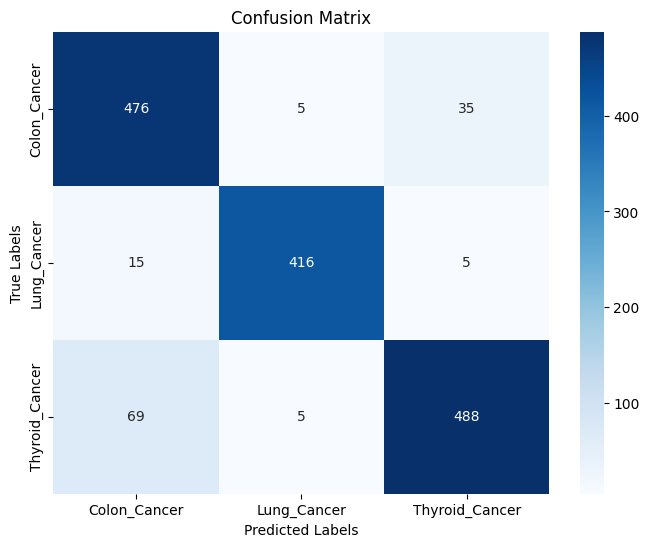

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
